<a href="https://colab.research.google.com/github/Ashju385/Dengue-Prediction-using-ML/blob/main/Dengue_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/drive/My Drive/DengueData/DengueAndClimateBangladesh.csv")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

df.head()

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
0,2008,1,12.993929,25.059539,78.824885,1.286636,0
1,2008,2,13.658286,26.383448,72.602956,0.687685,0
2,2008,3,20.411250,31.367558,76.903226,0.974194,0
3,2008,4,22.771889,34.031619,73.943810,0.980952,0
4,2008,5,23.945625,34.171060,77.360369,7.021198,0


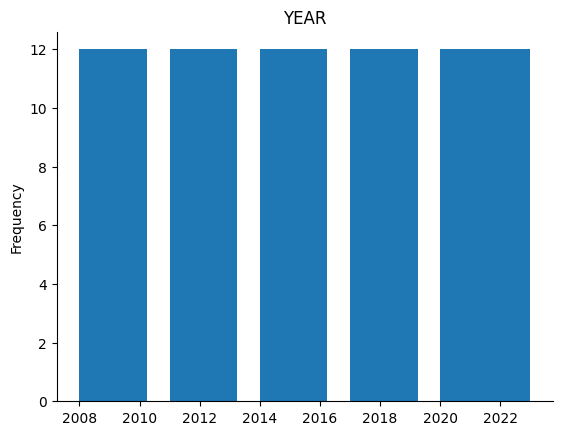

In [ ]:
# @title YEAR

from matplotlib import pyplot as plt
df['YEAR'].plot(kind='hist', bins=20, title='YEAR')
plt.gca().spines[['top', 'right',]].set_visible(False)

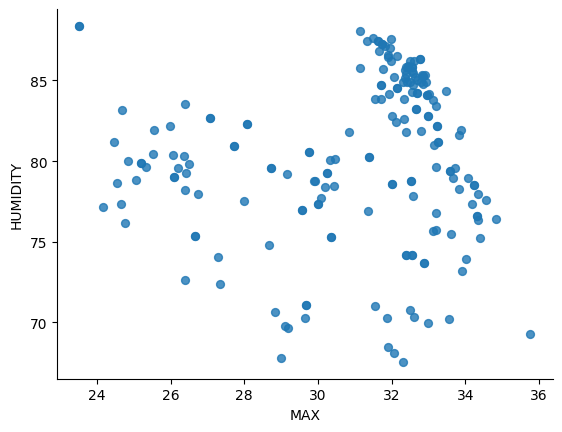

In [ ]:
# @title MAX vs HUMIDITY

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='MAX', y='HUMIDITY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

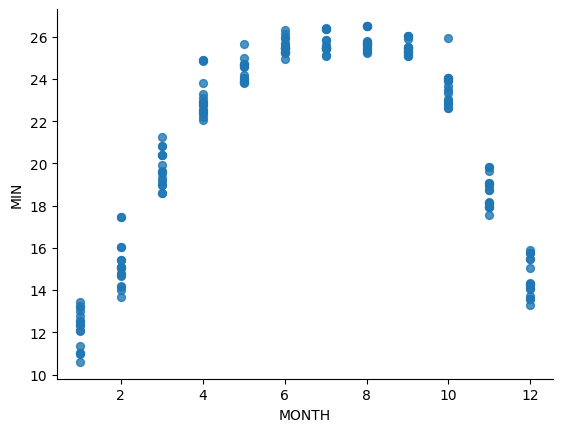

In [ ]:
# @title MONTH vs MIN

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='MONTH', y='MIN', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

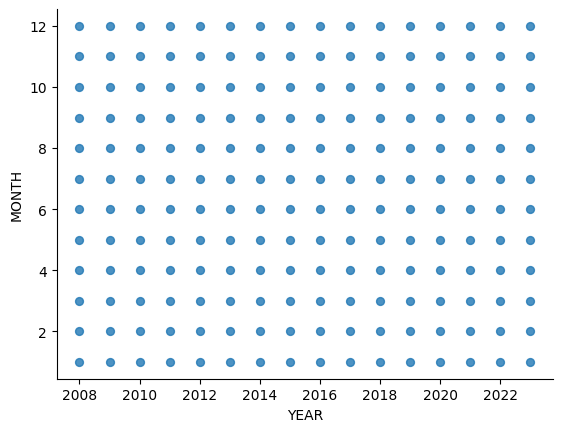

In [ ]:
# @title YEAR vs MONTH

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='YEAR', y='MONTH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

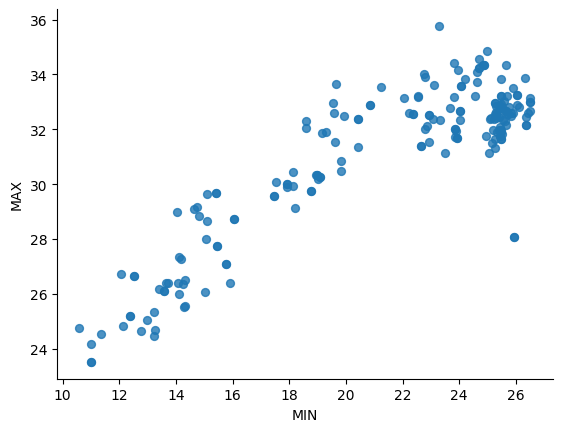

In [ ]:
# @title MIN vs MAX

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='MIN', y='MAX', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

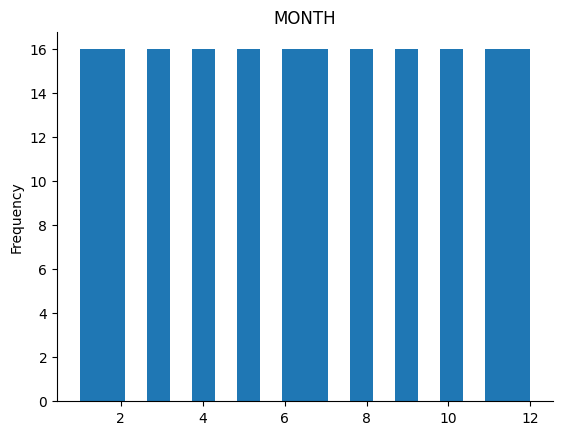

In [ ]:
# @title MONTH

from matplotlib import pyplot as plt
df['MONTH'].plot(kind='hist', bins=20, title='MONTH')
plt.gca().spines[['top', 'right',]].set_visible(False)

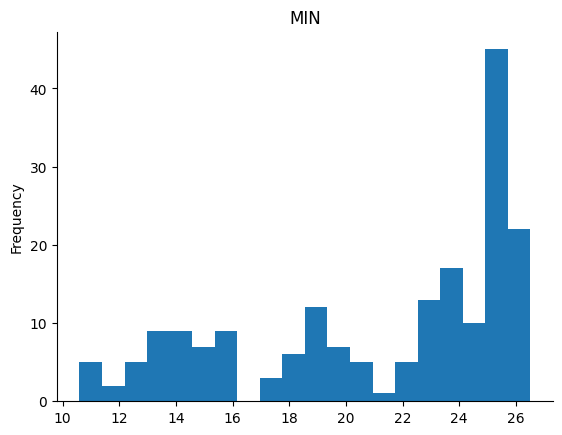

In [ ]:
# @title MIN

from matplotlib import pyplot as plt
df['MIN'].plot(kind='hist', bins=20, title='MIN')
plt.gca().spines[['top', 'right',]].set_visible(False)

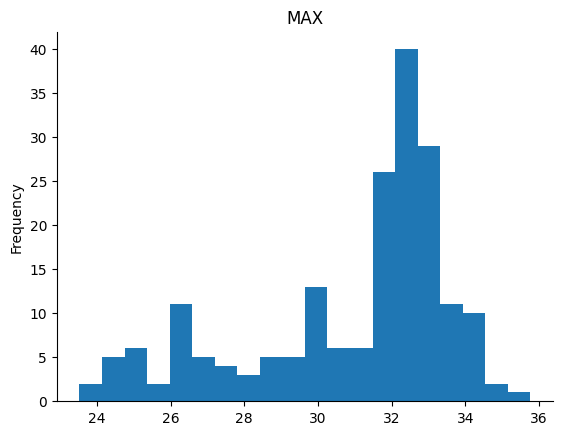

In [ ]:
# @title MAX

from matplotlib import pyplot as plt
df['MAX'].plot(kind='hist', bins=20, title='MAX')
plt.gca().spines[['top', 'right',]].set_visible(False)

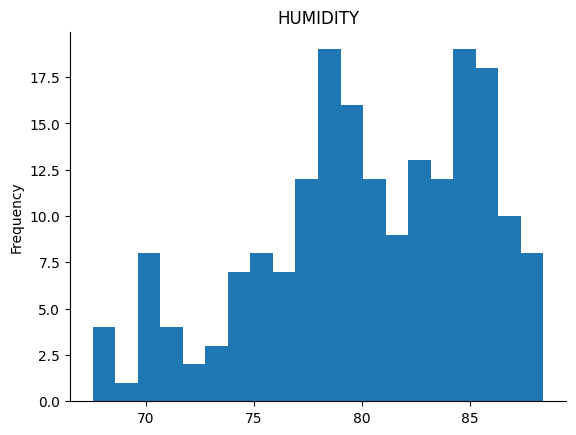

In [ ]:
# @title HUMIDITY

from matplotlib import pyplot as plt
df['HUMIDITY'].plot(kind='hist', bins=20, title='HUMIDITY')
plt.gca().spines[['top', 'right',]].set_visible(False)

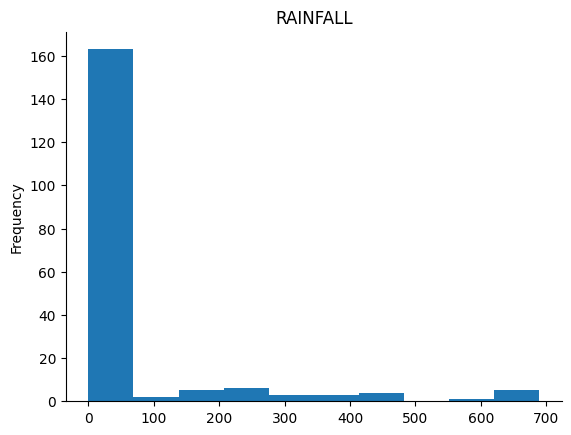

In [ ]:
# @title RAINFALL

from matplotlib import pyplot as plt
df['RAINFALL'].plot(kind='hist', bins=10, title='RAINFALL')
plt.gca().spines[['top', 'right',]].set_visible(False)

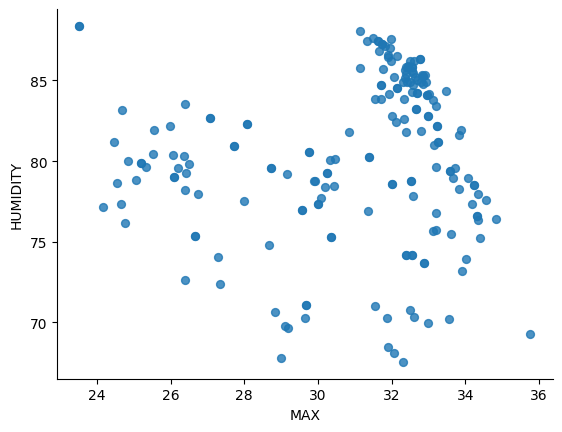

In [ ]:
# @title HUMIDITY vs RAINFALL

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='MAX', y='HUMIDITY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

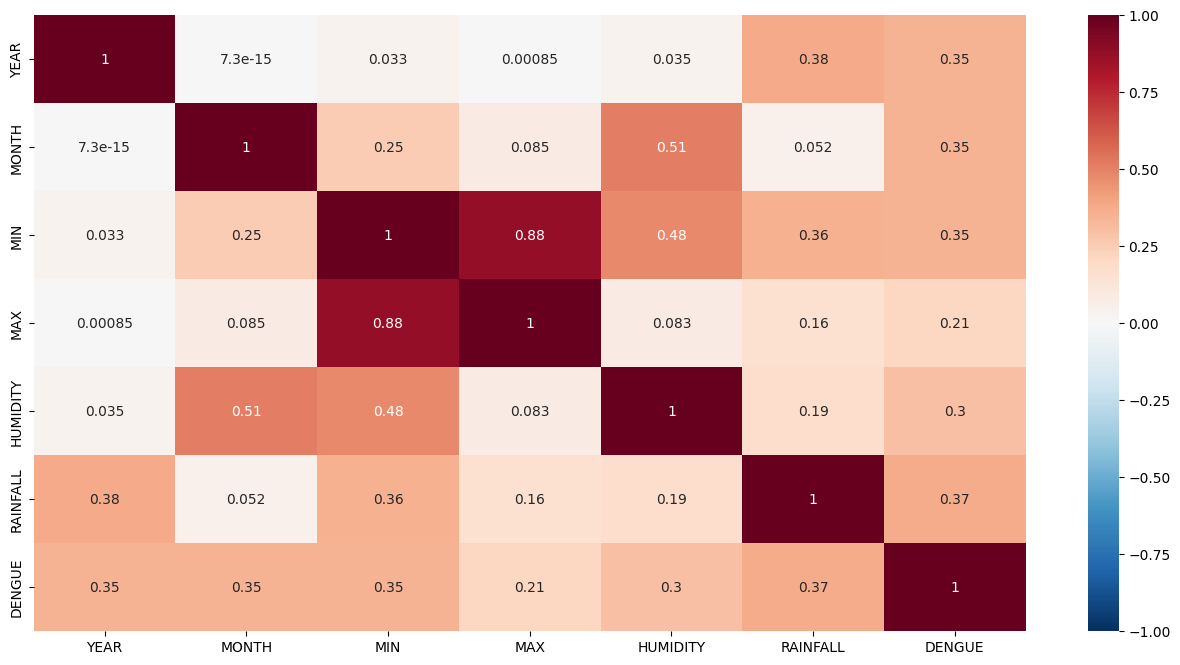

In [ ]:
correlation = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
x=df.groupby('MONTH')['DENGUE'].median().sort_values()
x.plot(kind='bar',figsize=(12,8),fontsize=12)
plt.show()

NameError: name 'df' is not defined

<Figure size 2000x800 with 0 Axes>

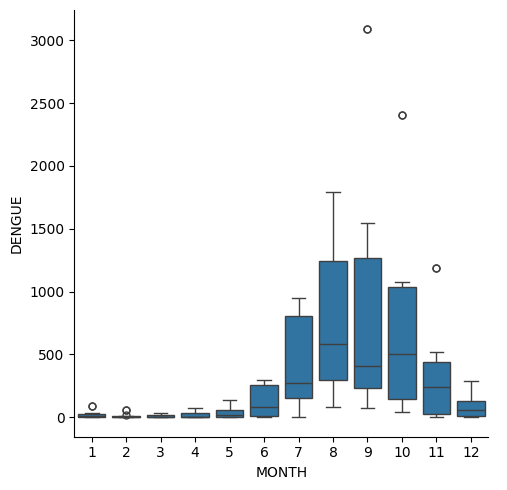

In [ ]:
plt.figure(figsize=(20, 8))
ax=sns.catplot(x="MONTH", y="DENGUE", kind="box", data=df);


<ipython-input-25-983fbe6538c9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 10)` for the same effect.

  ax = sns.lineplot(x="YEAR", y="DENGUE",ci=10,color="blue", label="DENGUE",data=df)


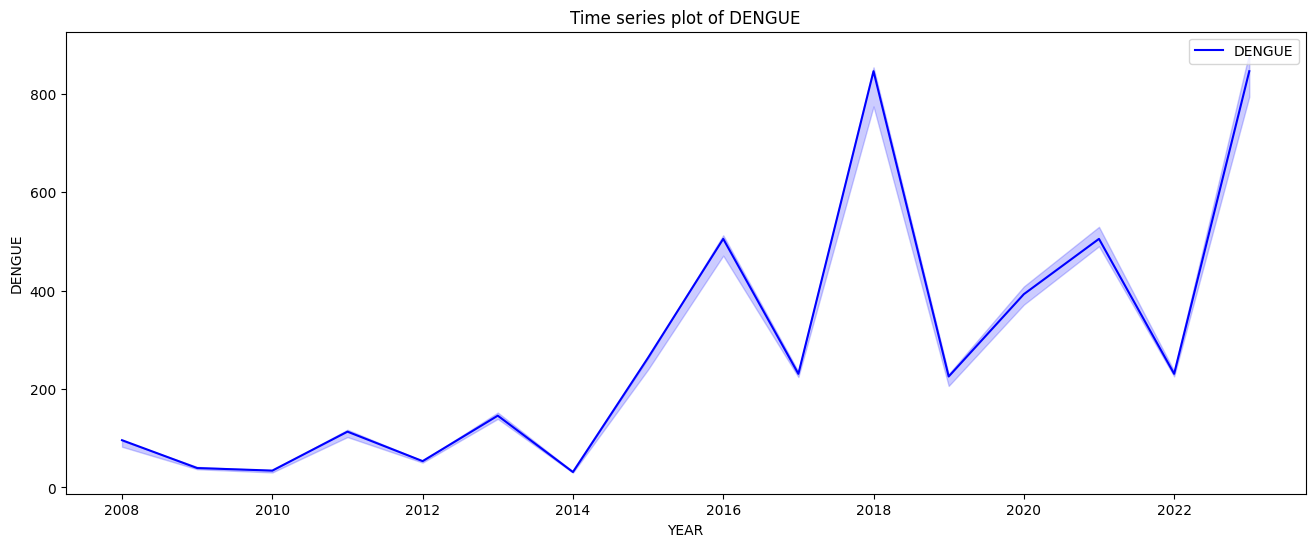

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('Time series plot of DENGUE')
ax = sns.lineplot(x="YEAR", y="DENGUE",ci=10,color="blue", label="DENGUE",data=df)

<ipython-input-26-1dcd4346263e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 10)` for the same effect.

  ax = sns.lineplot(x="HUMIDITY", y="DENGUE",ci=10,color="blue", label="DENGUE",data=df)


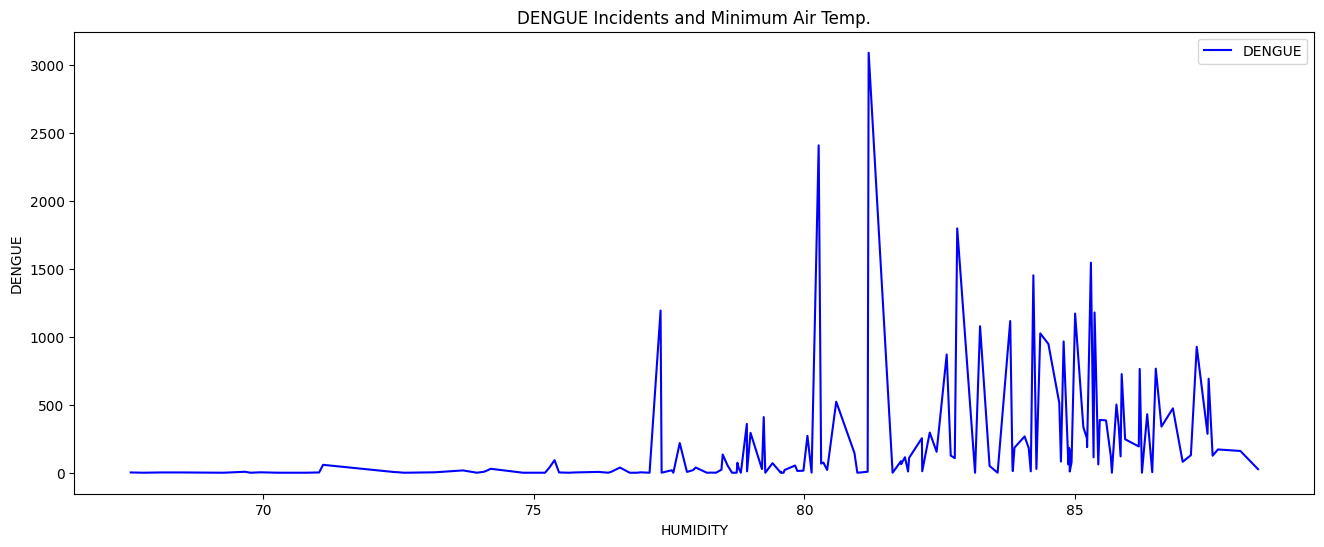

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('DENGUE Incidents and Minimum Air Temp.')
ax = sns.lineplot(x="HUMIDITY", y="DENGUE",ci=10,color="blue", label="DENGUE",data=df)

<ipython-input-27-15b732991beb>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 10)` for the same effect.

  ax = sns.lineplot(x="RAINFALL", y="DENGUE",ci=10,color="blue", label="DENGUE",data=df)


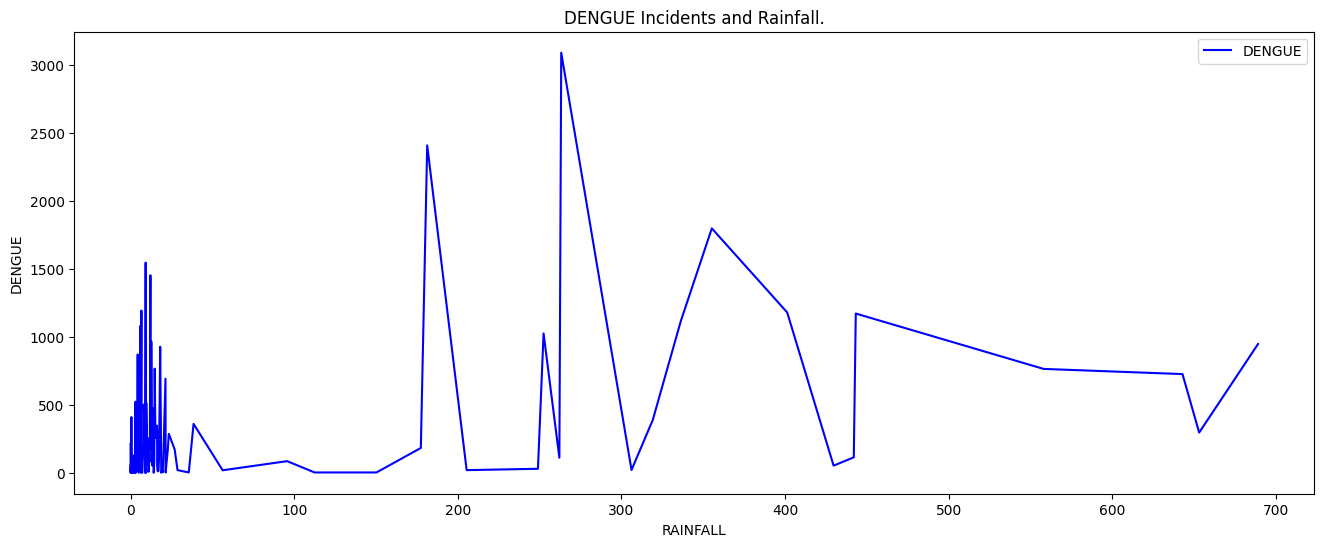

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('DENGUE Incidents and Rainfall.')
ax = sns.lineplot(x="RAINFALL", y="DENGUE",ci=10,color="blue", label="DENGUE",data=df)

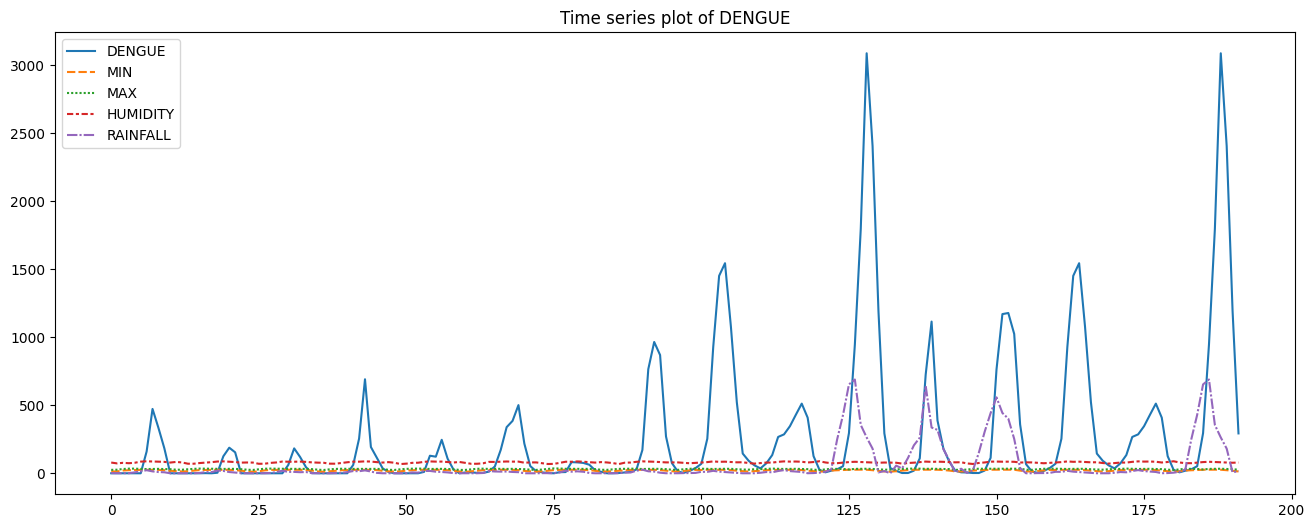

In [ ]:
df2=df[["DENGUE","MIN","MAX","HUMIDITY","RAINFALL"]]
plt.figure(figsize=(16, 6))
plt.title('Time series plot of DENGUE')
ax = sns.lineplot(data=df2)

In [ ]:
# Drop the 'date' column
df = df.drop(columns=['YEAR'])
df = df.drop(columns=['MONTH'])
# Calculate IQR for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define threshold for identifying outliers and extreme values
outlier_threshold = 1.5
extreme_threshold = 3

# Identify outliers and extreme values
outliers = (df < (Q1 - outlier_threshold * IQR)) | (df > (Q3 + outlier_threshold * IQR))
extremes = (df < (Q1 - extreme_threshold * IQR)) | (df > (Q3 + extreme_threshold * IQR))

# Delete rows containing outliers and extreme values
data_cleaned = df[~outliers.any(axis=1) & ~extremes.any(axis=1)]

# Display the cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", data_cleaned.shape)

Original DataFrame shape: (192, 5)
Cleaned DataFrame shape: (140, 5)


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Drop the 'YEAR' and 'MONTH' columns
df = df.drop(columns=['YEAR', 'MONTH'])

# Calculate IQR for the 'DENGUE' column
Q1 = df['DENGUE'].quantile(0.25)
Q3 = df['DENGUE'].quantile(0.75)
IQR = Q3 - Q1

# Define threshold for identifying outliers and extreme values
outlier_threshold = 1.5
extreme_threshold = 3

# Identify outliers and extreme values for the 'DENGUE' column
outliers = (df['DENGUE'] < (Q1 - outlier_threshold * IQR)) | (df['DENGUE'] > (Q3 + outlier_threshold * IQR))
extremes = (df['DENGUE'] < (Q1 - extreme_threshold * IQR)) | (df['DENGUE'] > (Q3 + extreme_threshold * IQR))

# Delete rows containing outliers and extreme values in the 'DENGUE' column
data_cleaned = df[~outliers & ~extremes]

# Display the cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", data_cleaned.shape)


Original DataFrame shape: (192, 5)
Cleaned DataFrame shape: (166, 5)


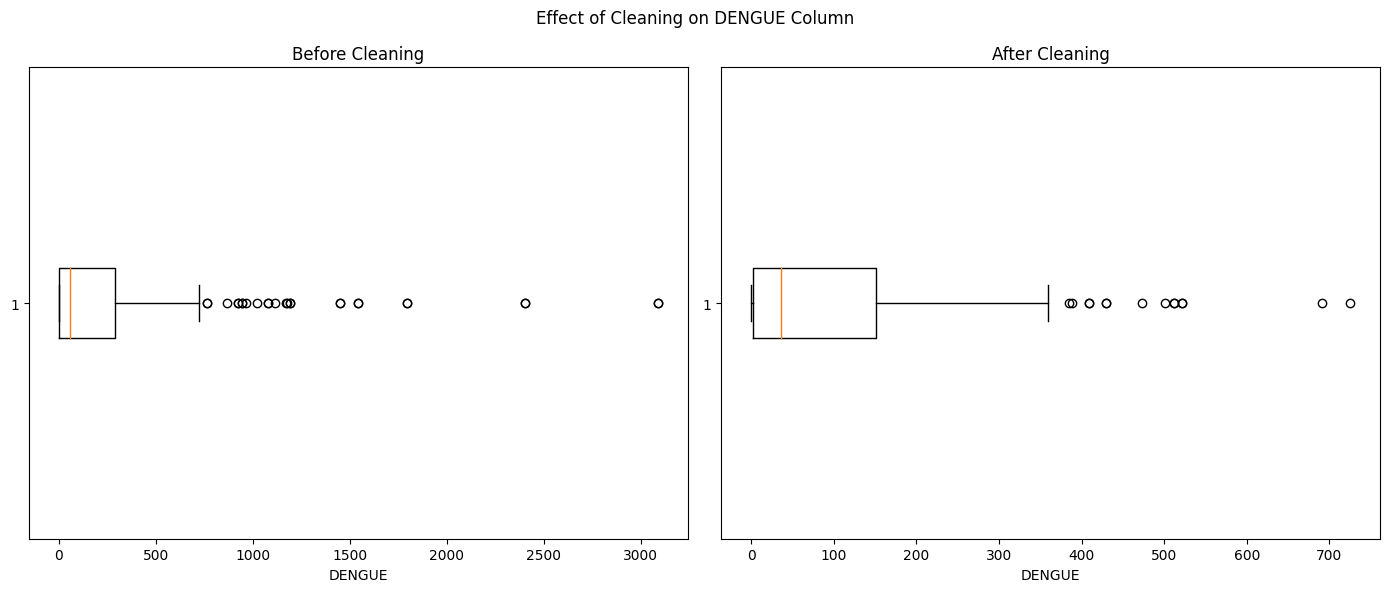

In [ ]:


# Plotting the box plot to visualize the 'DENGUE' column before and after cleaning
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['DENGUE'], vert=False)
plt.title('Before Cleaning')
plt.xlabel('DENGUE')

plt.subplot(1, 2, 2)
plt.boxplot(data_cleaned['DENGUE'], vert=False)
plt.title('After Cleaning')
plt.xlabel('DENGUE')

plt.suptitle('Effect of Cleaning on DENGUE Column')
plt.tight_layout()
plt.show()


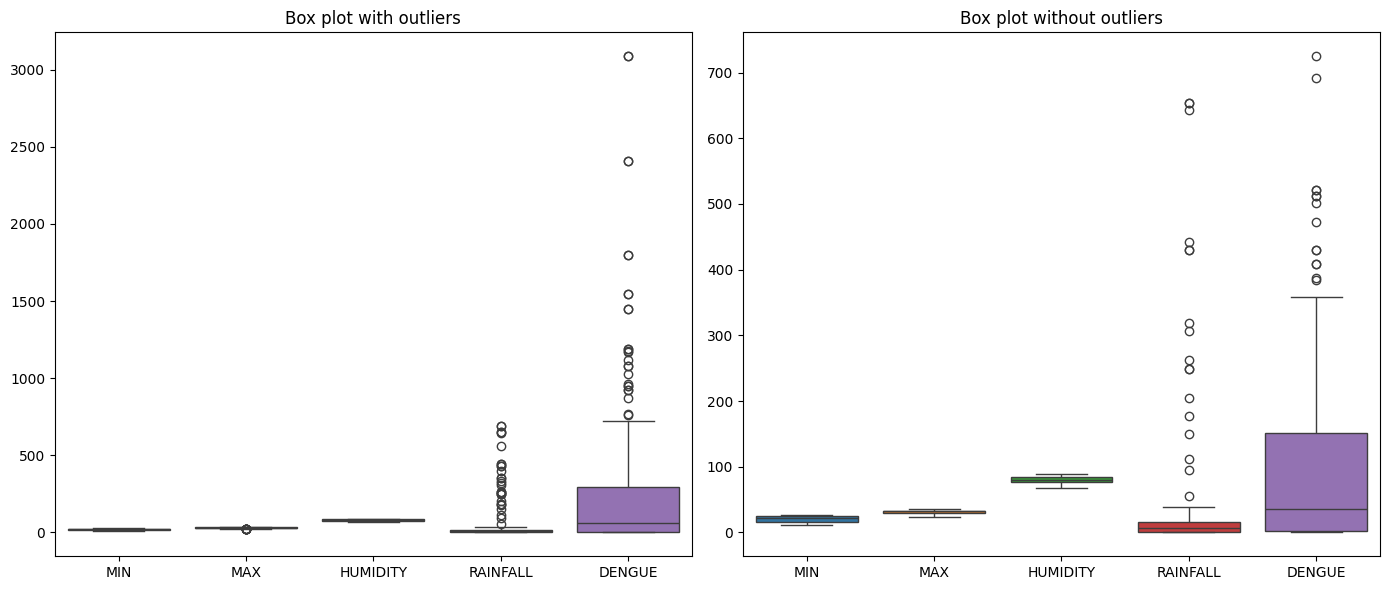

In [ ]:
# Plotting box plots with and without outliers
plt.figure(figsize=(14, 6))

# Box plot with outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=df)
plt.title('Box plot with outliers')

# Box plot without outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=data_cleaned)
plt.title('Box plot without outliers')

plt.tight_layout()
plt.show()

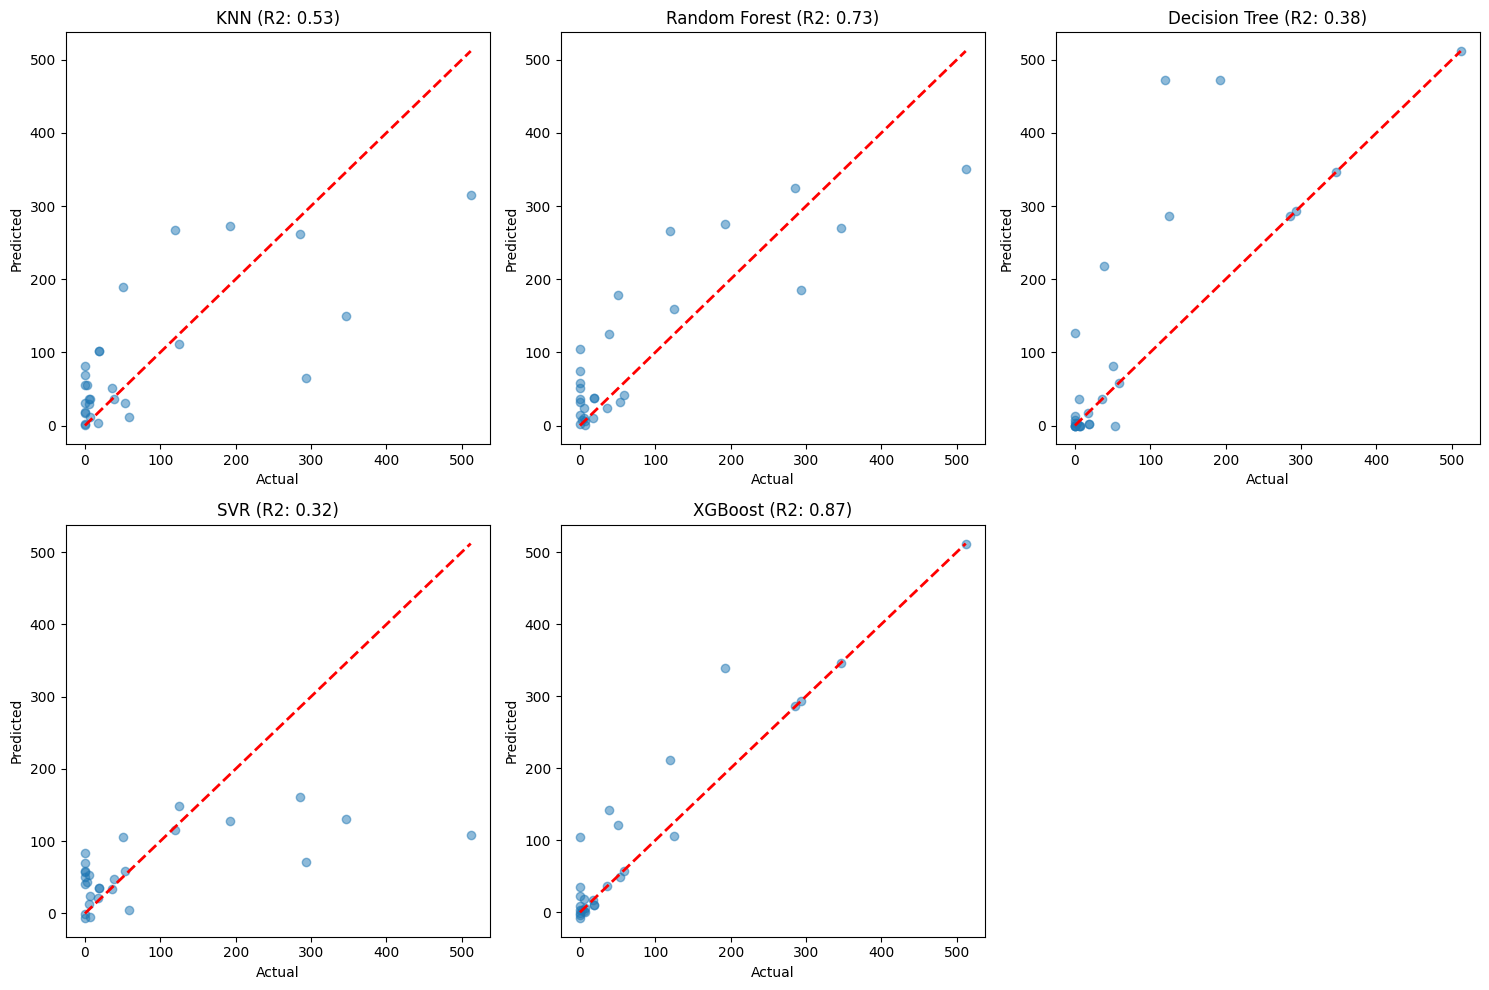

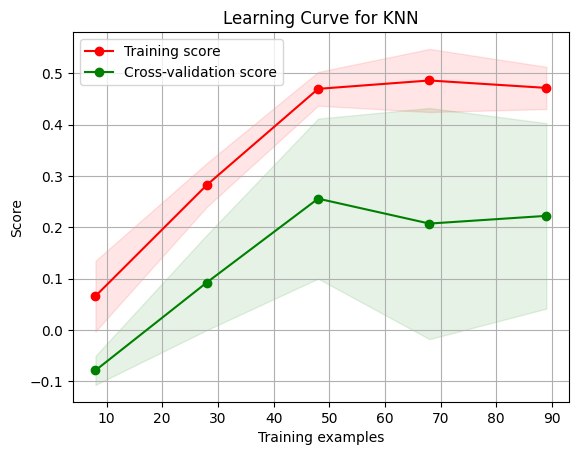

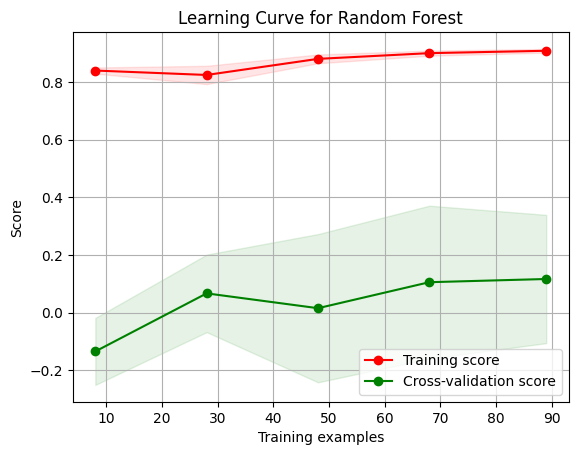

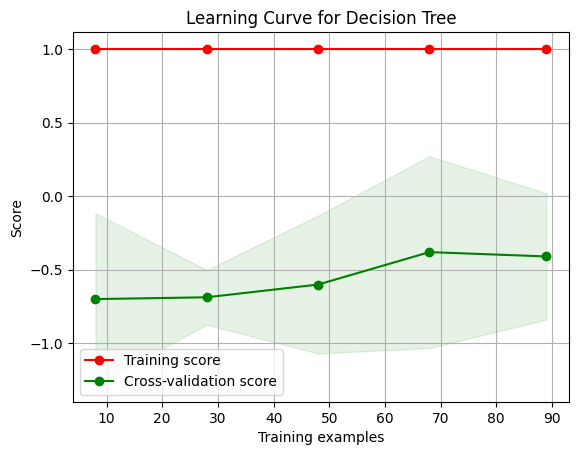

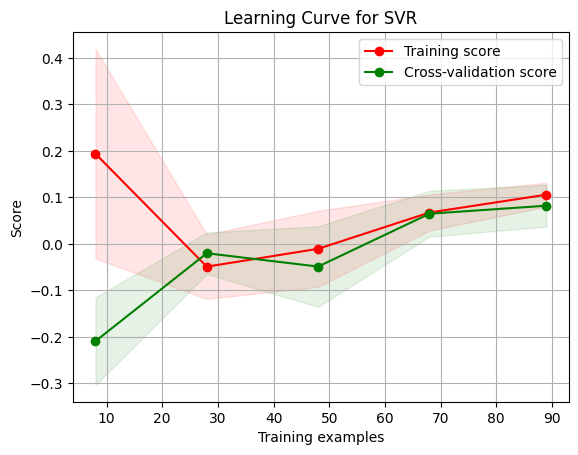

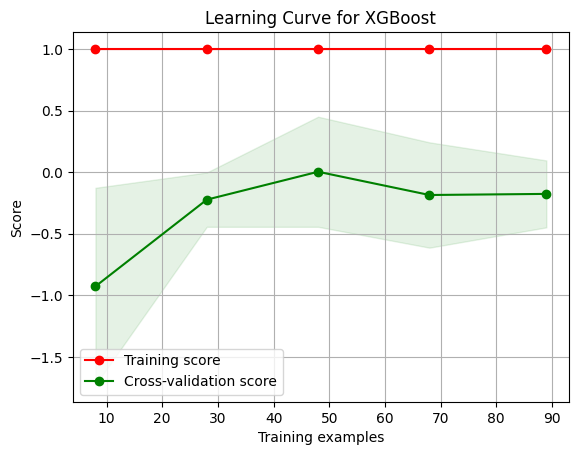


KNN Results:
MAE: 60.857142857142854
MSE: 7680.4
RMSE: 87.63789134843444
R2: 0.5299082368261214

Random Forest Results:
MAE: 48.53520408163267
MSE: 4462.989832361515
RMSE: 66.80561228191472
R2: 0.726835222212135

Decision Tree Results:
MAE: 46.17857142857143
MSE: 10103.32142857143
RMSE: 100.51527957764148
R2: 0.38160926719056654

SVR Results:
MAE: 61.15083765818345
MSE: 11139.635733090758
RMSE: 105.54447277375901
R2: 0.3181799121291371

XGBoost Results:
MAE: 23.73631828708208
MSE: 2119.2603885030826
RMSE: 46.035425364637206
R2: 0.8702871136065865


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

# Load dataset
df = data_cleaned

# Separate features and target
X = df[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']]
y = df['DENGUE']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature engineering
def create_features(X_scaled):
    avg_temp = (X_scaled[:, 0] + X_scaled[:, 1]) / 2
    interaction = X_scaled[:, 2] * X_scaled[:, 3]  # Example interaction term
    return pd.DataFrame(np.c_[X_scaled, avg_temp.reshape(-1, 1), interaction.reshape(-1, 1)],
                        columns=list(X.columns) + ['AVG_TEMP', 'HUMIDITY_RAINFALL_PRODUCT'])

X_train_eng = create_features(X_train_scaled)
X_test_eng = create_features(X_test_scaled)

# Define models with some hyperparameter options
models = {
    "KNN": GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors': range(1, 11)}),
    "Random Forest": RandomForestRegressor(n_estimators=70, random_state=12),  # Adjust n_estimators as needed
    "Decision Tree": DecisionTreeRegressor(),  # Can tune max_depth, min_samples_split etc.
    "SVR": GridSearchCV(SVR(), param_grid={'kernel': ['linear'], 'C': [0.1, 1, 10]}),
    "XGBoost": xgb.XGBRegressor()  # XGBoost has many tunable parameters
}

# Plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Perform cross-validation and evaluation with best hyperparameters
results = {}
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_eng, y_train)
    y_pred = model.predict(X_test_eng)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

    # Plot predicted vs actual values
    plt.subplot(2, 3, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} (R2: {r2:.2f})')

plt.tight_layout()
plt.show()

# Plot learning curve for each model
for name, model in models.items():
    plot_learning_curve(model.best_estimator_ if hasattr(model, 'best_estimator_') else model,
                        f"Learning Curve for {name}", X_train_eng, y_train, cv=5, n_jobs=-1)
    plt.show()

# Print results
for name, result in results.items():
    print(f"\n{name} Results:")
    for metric, value in result.items():
        print(f"{metric}: {value}")


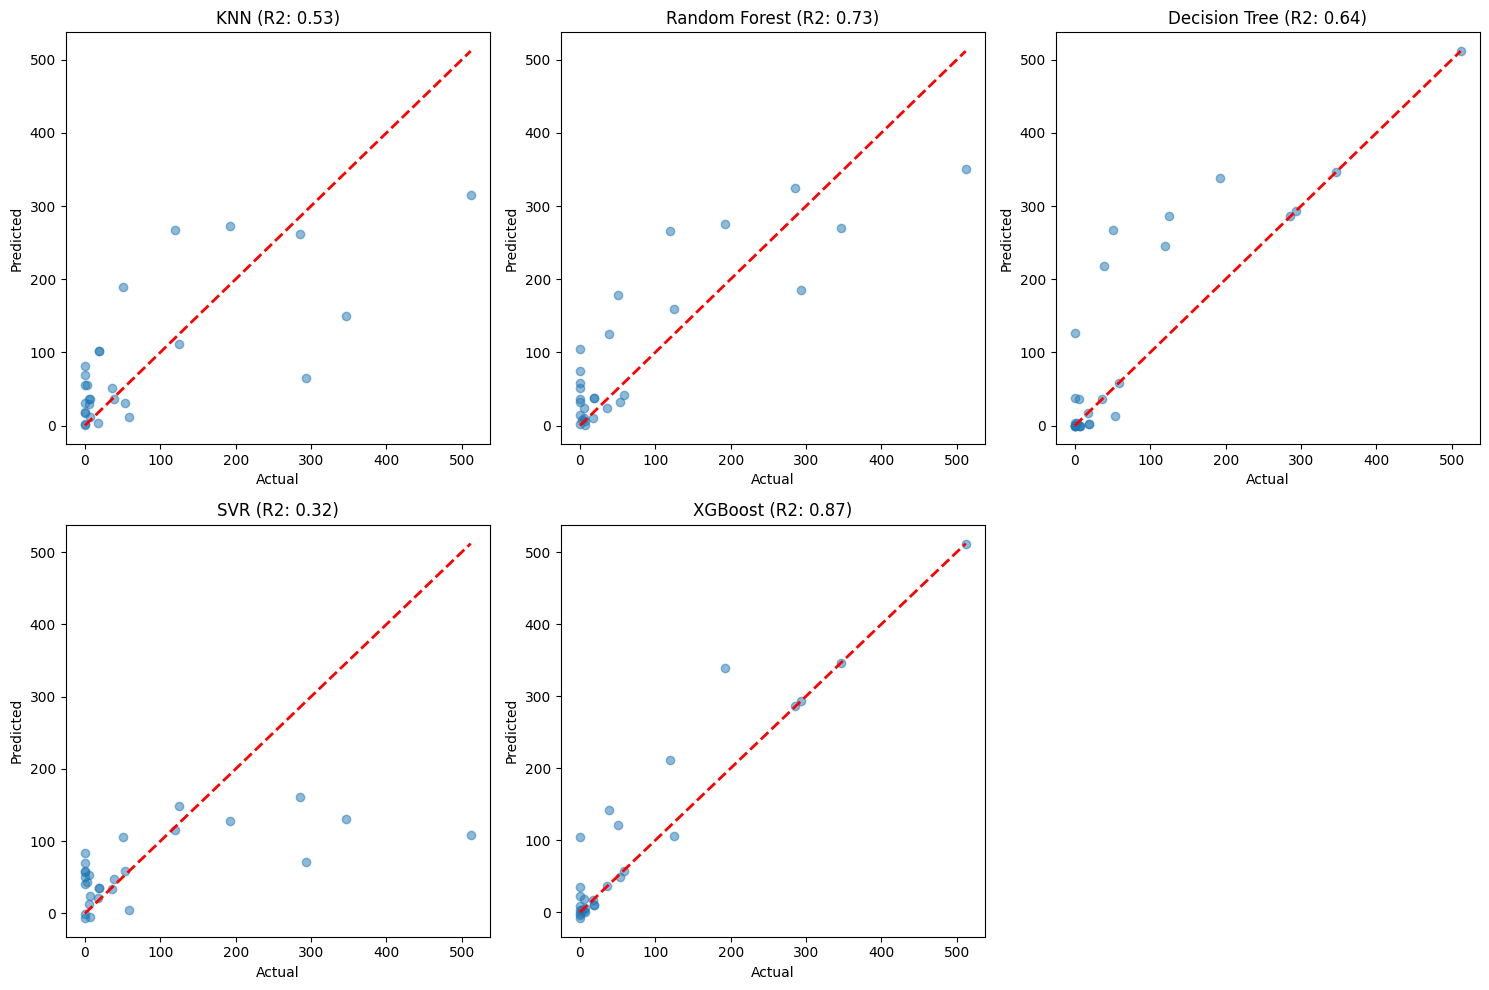

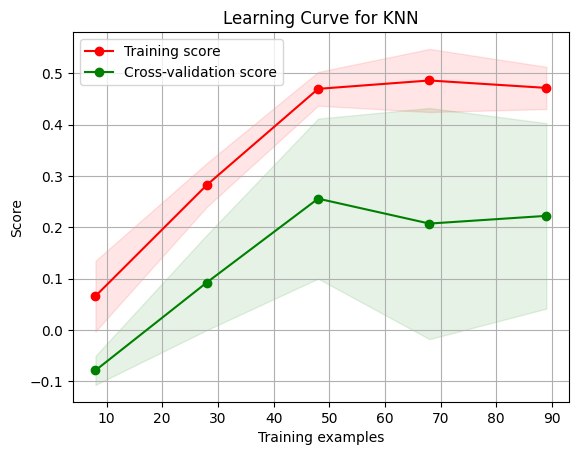

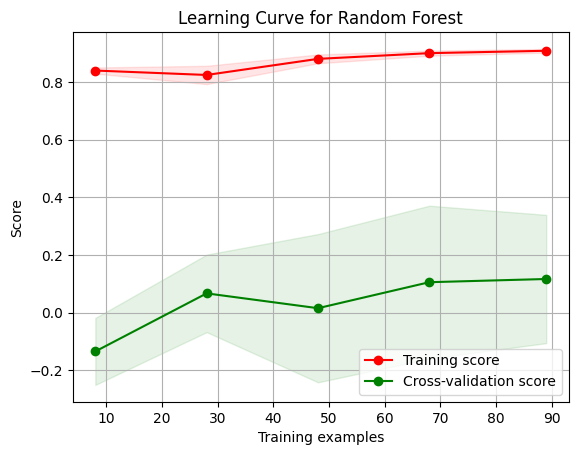

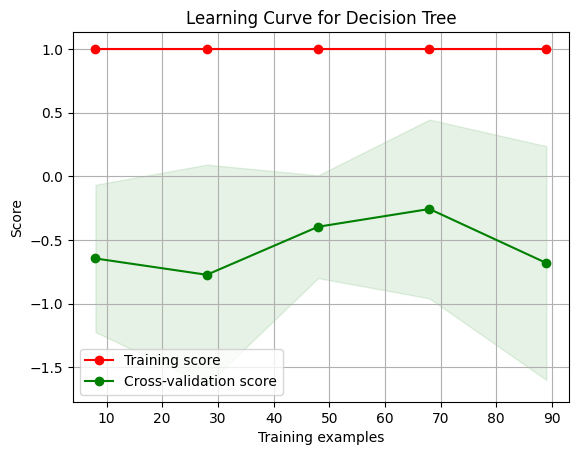

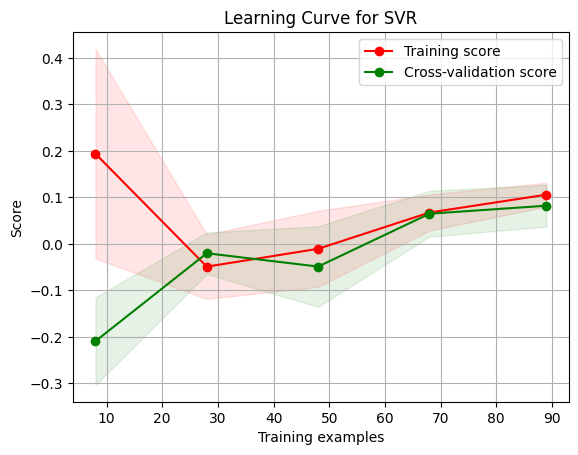

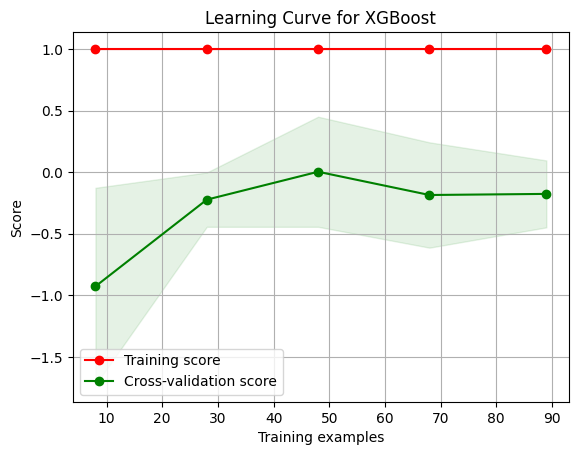


KNN Results:
MAE: 60.857142857142854
MSE: 7680.4
RMSE: 87.63789134843444
R-Squared: 0.5299082368261214

Random Forest Results:
MAE: 48.53520408163267
MSE: 4462.989832361515
RMSE: 66.80561228191472
R-Squared: 0.726835222212135

Decision Tree Results:
MAE: 40.07142857142857
MSE: 5826.571428571428
RMSE: 76.33198168901046
R-Squared: 0.6433749236868278

SVR Results:
MAE: 61.15083765818345
MSE: 11139.635733090758
RMSE: 105.54447277375901
R-Squared: 0.3181799121291371

XGBoost Results:
MAE: 23.73631828708208
MSE: 2119.2603885030826
RMSE: 46.035425364637206
R-Squared: 0.8702871136065865


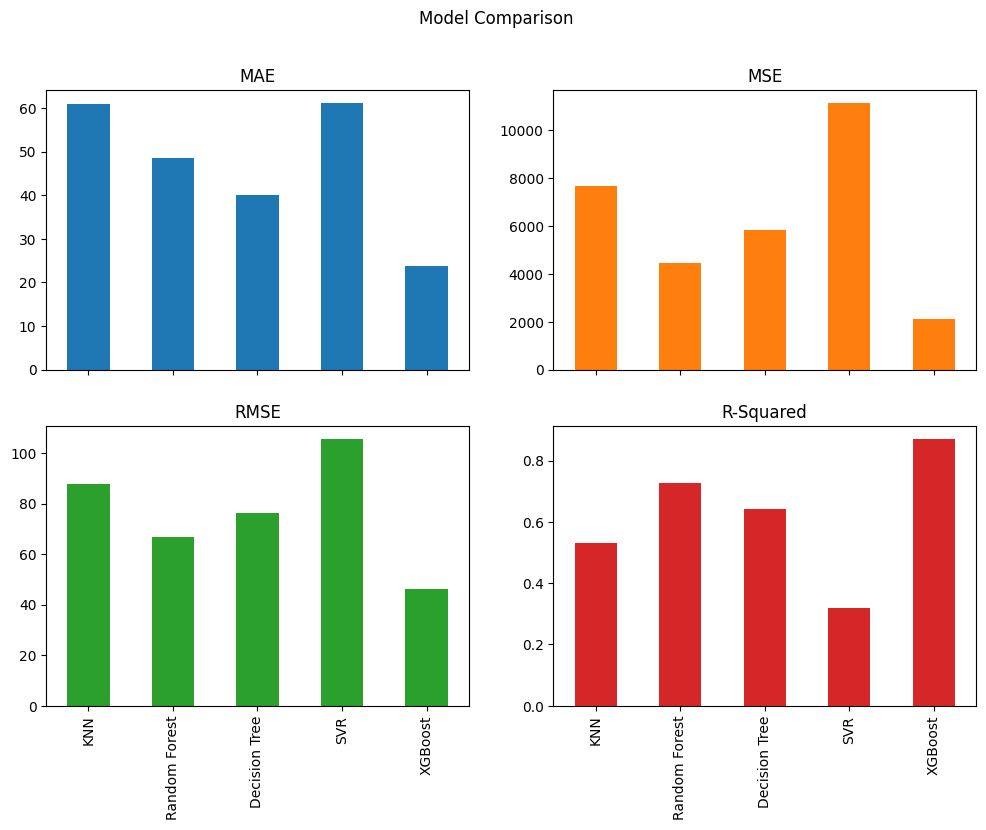

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

# Load dataset
df = data_cleaned

# Separate features and target
X = df[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']]
y = df['DENGUE']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature engineering
def create_features(X_scaled):
    avg_temp = (X_scaled[:, 0] + X_scaled[:, 1]) / 2
    interaction = X_scaled[:, 2] * X_scaled[:, 3]  # Example interaction term
    return pd.DataFrame(np.c_[X_scaled, avg_temp.reshape(-1, 1), interaction.reshape(-1, 1)],
                        columns=list(X.columns) + ['AVG_TEMP', 'HUMIDITY_RAINFALL_PRODUCT'])

X_train_eng = create_features(X_train_scaled)
X_test_eng = create_features(X_test_scaled)

# Define models with some hyperparameter options
models = {
    "KNN": GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors': range(1, 11)}),
    "Random Forest": RandomForestRegressor(n_estimators=70, random_state=12),  # Adjust n_estimators as needed
    "Decision Tree": DecisionTreeRegressor(),  # Can tune max_depth, min_samples_split etc.
    "SVR": GridSearchCV(SVR(), param_grid={'kernel': ['linear'], 'C': [0.1, 1, 10]}),
    "XGBoost": xgb.XGBRegressor()  # XGBoost has many tunable parameters
}

# Plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Perform cross-validation and evaluation with best hyperparameters
results = {}
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_eng, y_train)
    y_pred = model.predict(X_test_eng)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R-Squared': r2}

    # Plot predicted vs actual values
    plt.subplot(2, 3, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} (R2: {r2:.2f})')

plt.tight_layout()
plt.show()

# Plot learning curve for each model
for name, model in models.items():
    plot_learning_curve(model.best_estimator_ if hasattr(model, 'best_estimator_') else model,
                        f"Learning Curve for {name}", X_train_eng, y_train, cv=5, n_jobs=-1)
    plt.show()

# Print results
for name, result in results.items():
    print(f"\n{name} Results:")
    for metric, value in result.items():
        print(f"{metric}: {value}")

# Model comparison plot
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(12, 8), subplots=True, layout=(2, 2), legend=False, sharey=False)
plt.suptitle('Model Comparison')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


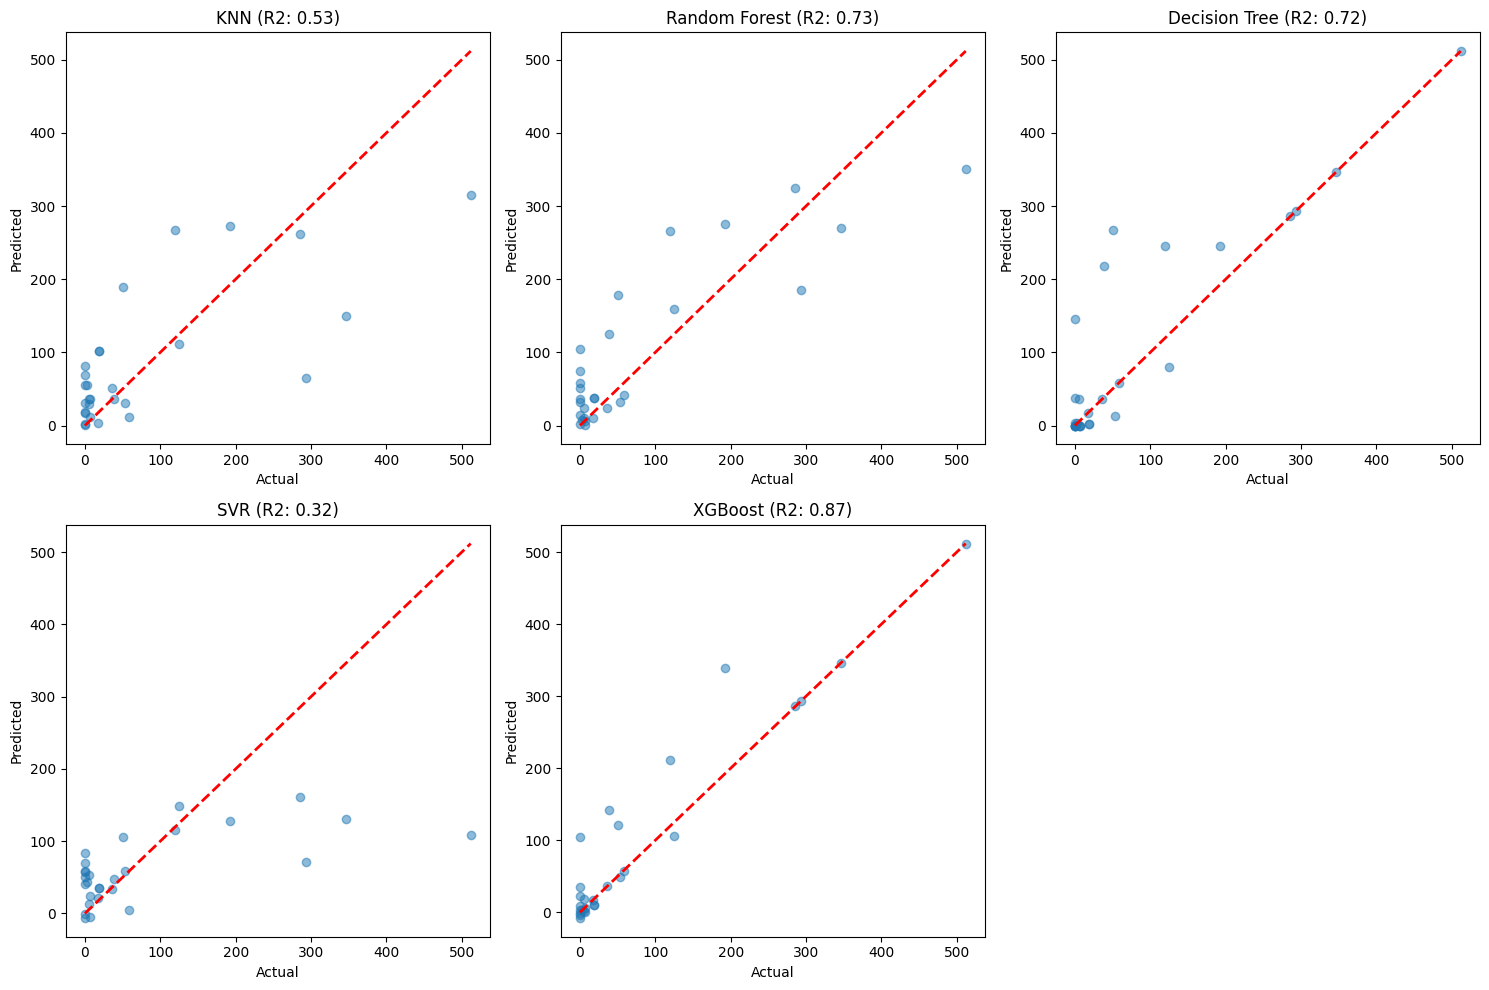

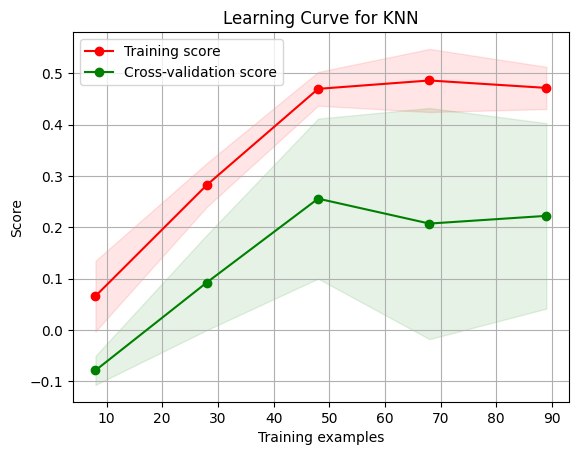

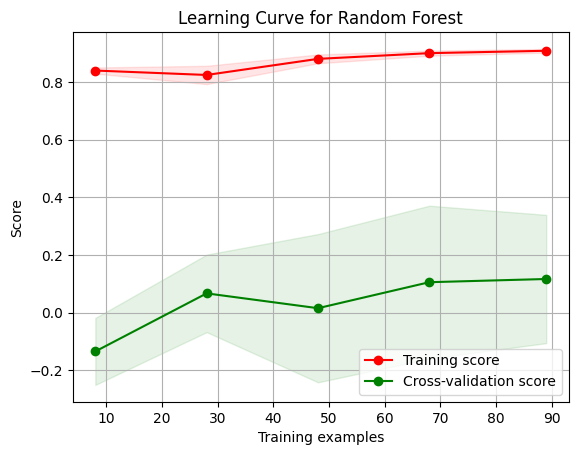

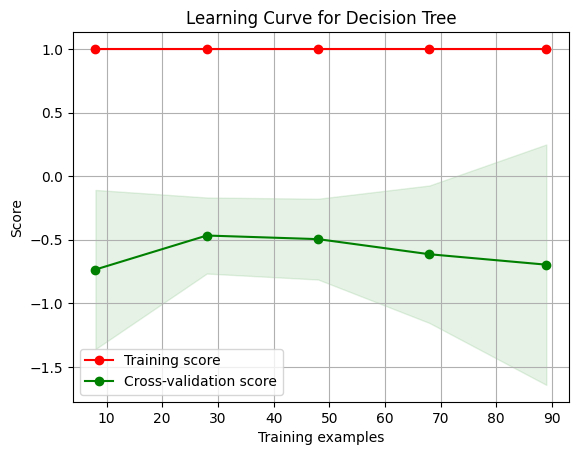

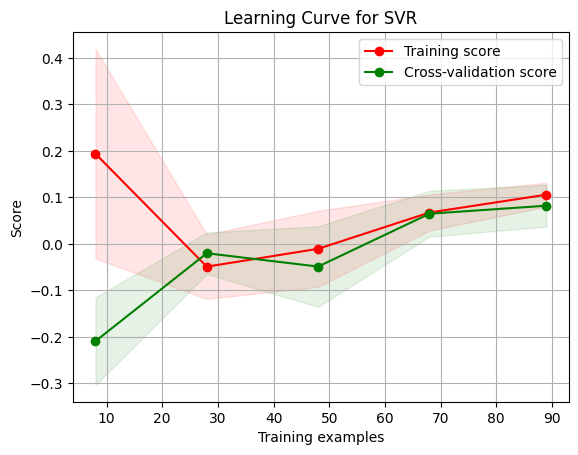

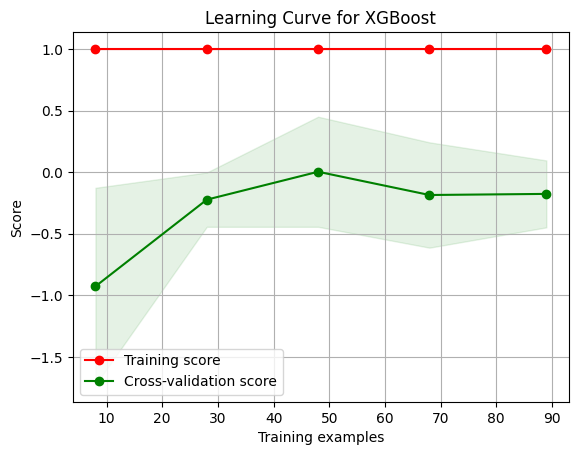


KNN Results:
MAE: 60.857142857142854
MSE: 7680.4
RMSE: 87.63789134843444
R2: 0.5299082368261214

Random Forest Results:
MAE: 48.53520408163267
MSE: 4462.989832361515
RMSE: 66.80561228191472
R2: 0.726835222212135

Decision Tree Results:
MAE: 33.25
MSE: 4496.035714285715
RMSE: 67.05248477339012
R2: 0.7248125935861023

SVR Results:
MAE: 61.15083765818345
MSE: 11139.635733090758
RMSE: 105.54447277375901
R2: 0.3181799121291371

XGBoost Results:
MAE: 23.73631828708208
MSE: 2119.2603885030826
RMSE: 46.035425364637206
R2: 0.8702871136065865


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

# Load dataset
df = data_cleaned

# Separate features and target
X = df[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']]
y = df['DENGUE']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature engineering
def create_features(X_scaled):
    avg_temp = (X_scaled[:, 0] + X_scaled[:, 1]) / 2
    interaction = X_scaled[:, 2] * X_scaled[:, 3]
    return pd.DataFrame(np.c_[X_scaled, avg_temp.reshape(-1, 1), interaction.reshape(-1, 1)],
                        columns=list(X.columns) + ['AVG_TEMP', 'HUMIDITY_RAINFALL_PRODUCT'])

X_train_eng = create_features(X_train_scaled)
X_test_eng = create_features(X_test_scaled)

# Define models with some hyperparameter options
models = {
    "KNN": GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors': range(1, 11)}),
    "Random Forest": RandomForestRegressor(n_estimators=70, random_state=12),
    "Decision Tree": DecisionTreeRegressor(),
    "SVR": GridSearchCV(SVR(), param_grid={'kernel': ['linear'], 'C': [0.1, 1, 10]}),
    "XGBoost": xgb.XGBRegressor()
}

# Plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Perform cross-validation and evaluation with best hyperparameters
results = {}
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_eng, y_train)
    y_pred = model.predict(X_test_eng)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

    # Plot predicted vs actual values
    plt.subplot(2, 3, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} (R2: {r2:.2f})')

plt.tight_layout()
plt.show()

# Plot learning curve for each model
for name, model in models.items():
    plot_learning_curve(model.best_estimator_ if hasattr(model, 'best_estimator_') else model,
                        f"Learning Curve for {name}", X_train_eng, y_train, cv=5, n_jobs=-1)
    plt.show()

# Print results
for name, result in results.items():
    print(f"\n{name} Results:")
    for metric, value in result.items():
        print(f"{metric}: {value}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Load dataset
df = data_cleaned

# Separate features and target
X = df[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']]
y = df['DENGUE']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature engineering
def create_features(X_scaled):
    avg_temp = (X_scaled[:, 0] + X_scaled[:, 1]) / 2
    interaction = X_scaled[:, 2] * X_scaled[:, 3]  # Example interaction term
    return pd.DataFrame(np.c_[X_scaled, avg_temp.reshape(-1, 1), interaction.reshape(-1, 1)],
                        columns=list(X.columns) + ['AVG_TEMP', 'HUMIDITY_RAINFALL_PRODUCT'])

X_train_eng = create_features(X_train_scaled)
X_test_eng = create_features(X_test_scaled)

# Train XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train_eng, y_train)
# Function to make a prediction with manually input data
def predict_dengue_cases(min_temp, max_temp, humidity, rainfall):
    # Create a dataframe with the input data
    input_data = pd.DataFrame([[min_temp, max_temp, humidity, rainfall]],
                              columns=['MIN', 'MAX', 'HUMIDITY', 'RAINFALL'])

    # Scale the input data
    input_data_scaled = scaler.transform(input_data)

    # Create features
    input_data_eng = create_features(input_data_scaled)

    # Make a prediction
    prediction = model.predict(input_data_eng)

    return prediction[0]

# Input data manually
min_temp = float(input("Enter minimum temperature: "))
max_temp = float(input("Enter maximum temperature: "))
humidity = float(input("Enter humidity: "))
rainfall = float(input("Enter rainfall: "))

# Get the prediction
predicted_cases = predict_dengue_cases(min_temp, max_temp, humidity, rainfall)

print(f"Predicted number of dengue cases: {predicted_cases:.2f}")

# Save the XGBoost model
model.save_model('xgb_model.json')


Enter minimum temperature: 30
Enter maximum temperature: 38
Enter humidity: 82
Enter rainfall: 1348
Predicted number of dengue cases: 32.17


In [ ]:
import json

# Load the XGBoost model
model = xgb.XGBRegressor()
model.load_model('xgb_model.json')

# Get the booster
booster = model.get_booster()

# Save the model dump to JSON
model_dump = booster.get_dump(dump_format="json")
with open('xgb_model_dump.json', 'w') as f:
    json.dump(model_dump, f)


In [ ]:
import tensorflow as tf
import json

# Load the model dump
with open('xgb_model_dump.json', 'r') as f:
    model_dump = json.load(f)

# Create a mapping from feature names to indices
feature_indices = {name: idx for idx, name in enumerate(X_train_eng.columns)}

# Define a function to parse the tree structure
def parse_tree(tree, feature_indices):
    def tree_predict(tree, x):
        if 'leaf' in tree:
            return tree['leaf']
        else:
            split_index = feature_indices[tree['split']]
            if x[split_index] < tree['split_condition']:
                return tree_predict(tree['children'][0], x)
            else:
                return tree_predict(tree['children'][1], x)
    return lambda x: tree_predict(tree, x)

# Parse the first tree (for demonstration)
trees = [parse_tree(json.loads(tree), feature_indices) for tree in model_dump]

# Create a TensorFlow function to use the parsed tree
class XGBoostTensorFlow(tf.Module):
    def __init__(self, trees):
        self.trees = trees

    @tf.function(input_signature=[tf.TensorSpec(shape=[None, X_train_eng.shape[1]], dtype=tf.float32)])
    def __call__(self, x):
        def tree_predict_fn(x_single):
            return sum(tree(x_single) for tree in self.trees)

        predictions = tf.map_fn(tree_predict_fn, x, dtype=tf.float32)
        return predictions

xgb_tf_model = XGBoostTensorFlow(trees)

# Save the wrapped model as a TensorFlow SavedModel
tf.saved_model.save(xgb_tf_model, "xgb_tf_model")


Instructions for updating:
Use fn_output_signature instead


In [ ]:
# Convert the SavedModel to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_saved_model("xgb_tf_model")
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open("xgb_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model saved to xgb_model.tflite")


Model saved to xgb_model.tflite


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming the scaler is already trained and available
# If the scaler is not saved, you need to reinitialize and fit it with the same training data

# Sample manual input data
# Example input: MIN, MAX, HUMIDITY, RAINFALL
sample_input_data = np.array([[30.0, 38.0, 82.0, 1348.0]], dtype=np.float32)

# Load the scaler if it was saved
# scaler = joblib.load('scaler.pkl')

# Apply the scaler (using the same scaler as used during training)
sample_input_data_scaled = scaler.transform(sample_input_data)

# Feature engineering: create AVG_TEMP and HUMIDITY_RAINFALL_PRODUCT
def create_features_manual(X_scaled):
    avg_temp = (X_scaled[:, 0] + X_scaled[:, 1]) / 2  # MIN is at index 0, MAX is at index 1
    interaction = X_scaled[:, 2] * X_scaled[:, 3]  # HUMIDITY is at index 2, RAINFALL is at index 3
    return np.c_[X_scaled, avg_temp.reshape(-1, 1), interaction.reshape(-1, 1)]

sample_input_data_eng = create_features_manual(sample_input_data_scaled)

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="xgb_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Ensure the input data matches the expected shape and type
input_data = np.array(sample_input_data_eng, dtype=np.float32)

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run the model
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])
print("TFLite model output:", output_data)


TFLite model output: [-86.568184]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
